In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,
                                                 test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

# 결정트리 시각화

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)

In [ ]:
# !pip install graphviz

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## 피처의 중요 역할 지표
> 분류에서 사용
- feature_importance_

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


<AxesSubplot:>

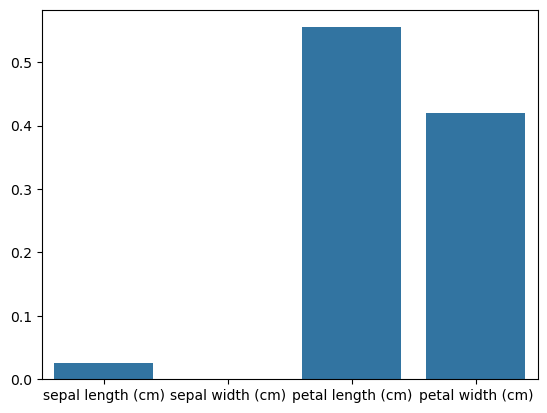

In [18]:
import seaborn as sns
import numpy as np

dt_clf.feature_importances_

for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name,value)
    
sns.barplot(x=iris_data.feature_names,y=dt_clf.feature_importances_)

# 결정트리 과적합

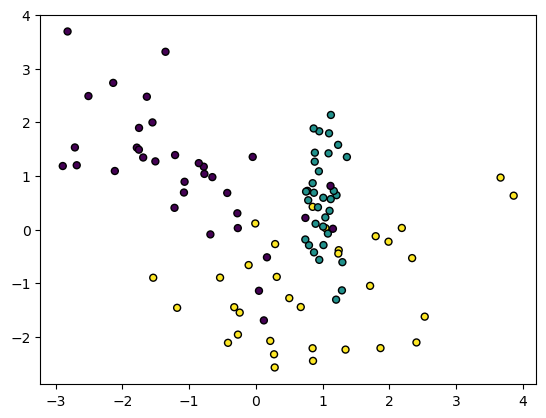

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X_feature,y_labels = make_classification(n_features=2, n_redundant=0,n_informative=2,
                                         n_classes=3,n_clusters_per_class=1,random_state=0)

plt.scatter(x=X_feature[:,0],y=X_feature[:,1],marker="o",c=y_labels,s=25,edgecolors='k')